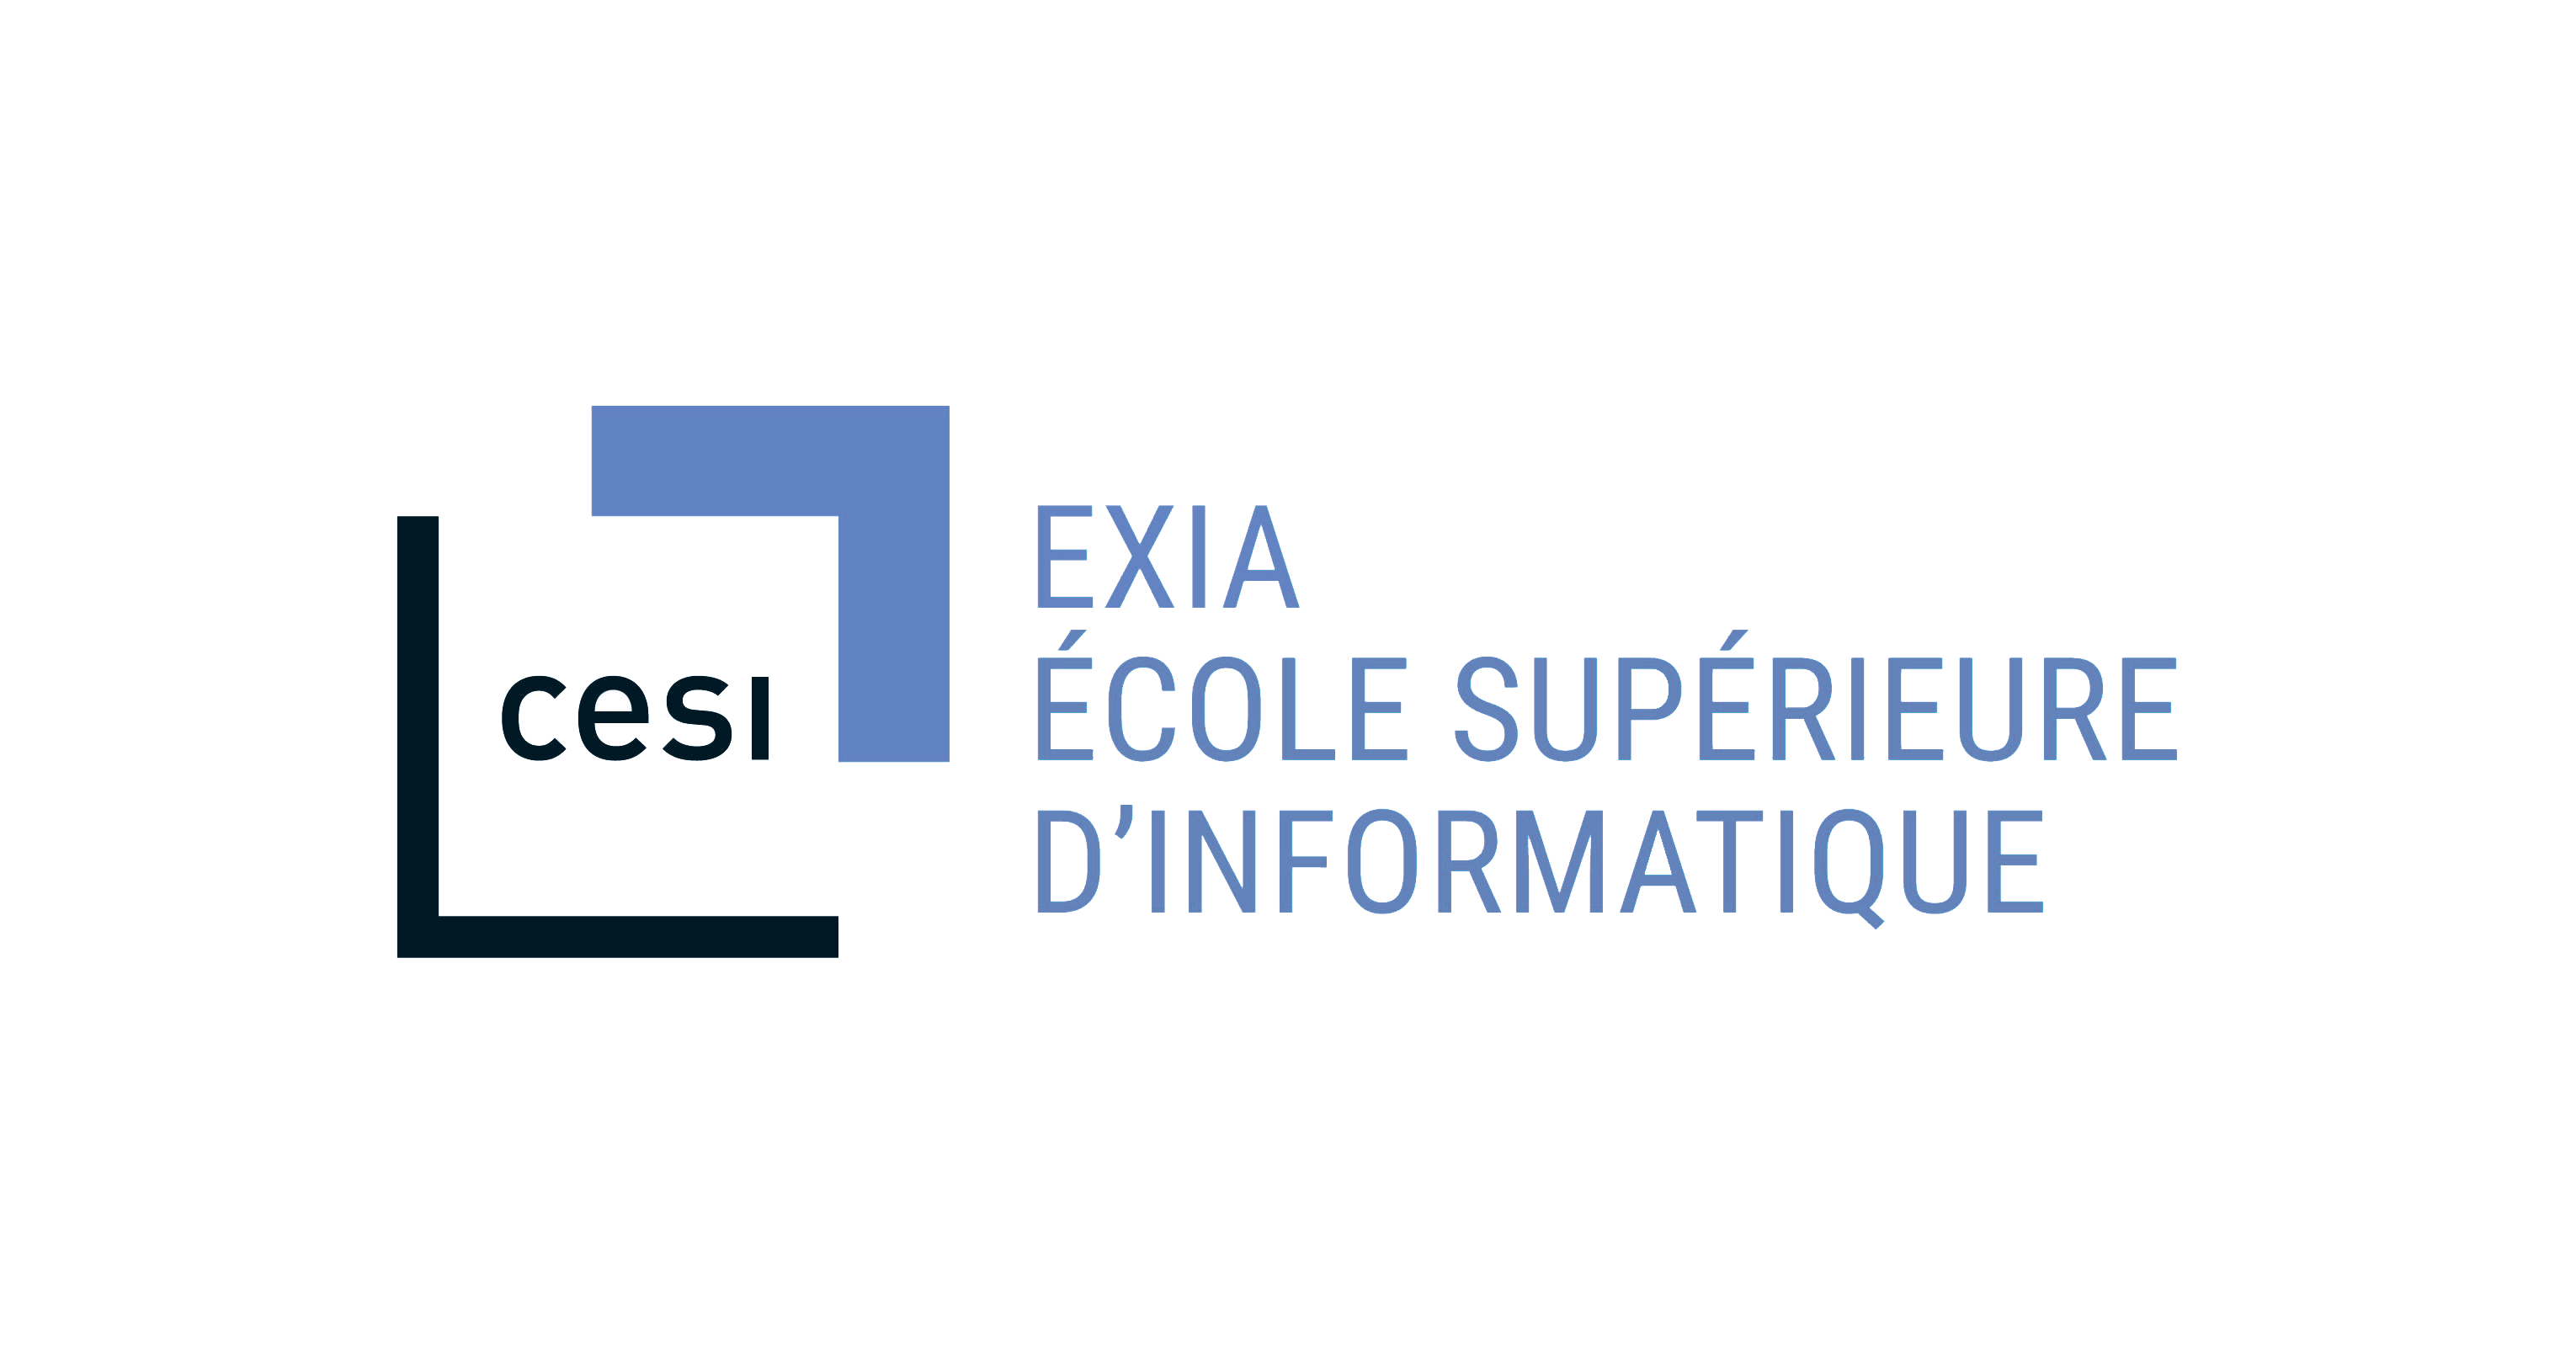

# Livrable 04
## Groupe 08
- Zaamouche Nadir
- Souici Reda
- Hanifi Chérif Sami 

## Introduction :
Une fois que la chaine de transmission a était bien detaillé, il est maintenant temps de la mettre en place et vous présenter notre prototype soigneusement crée pour nos agents de terrain afin d'éliminer tout problemes de communication ou d'exfiltration.

## Codage :
 L'agent infiltré devra coder le message en ASCII binaire puis l'encapsuler dans une trame, coder un autre message en Crc afin d'assurer l'abscence d'erreur et enfin le moduler pour l'envoyer.

In [16]:

def xor(a, b): 
   
    # initialize result 
    result = [] 
   
    # Traverse all bits, if bits are 
    # same, then XOR is 0, else 1 
    for i in range(1, len(b)): 
        if a[i] == b[i]: 
            result.append('0') 
        else: 
            result.append('1') 
   
    return ''.join(result) 
   
   
# Performs Modulo-2 division 
def mod2div(divident, divisor): 
   
    # Number of bits to be XORed at a time. 
    pick = len(divisor) 
   
    # Slicing the divident to appropriate 
    # length for particular step 
    tmp = divident[0 : pick] 
   
    while pick < len(divident): 
   
        if tmp[0] == '1': 
   
            # replace the divident by the result 
            # of XOR and pull 1 bit down 
            tmp = xor(divisor, tmp) + divident[pick] 
   
        else:   # If leftmost bit is '0' 
  
            # If the leftmost bit of the dividend (or the 
            # part used in each step) is 0, the step cannot 
            # use the regular divisor; we need to use an 
            # all-0s divisor. 
            tmp = xor('0'*pick, tmp) + divident[pick] 
   
        # increment pick to move further 
        pick += 1
   
    # For the last n bits, we have to carry it out 
    # normally as increased value of pick will cause 
    # Index Out of Bounds. 
    if tmp[0] == '1': 
        tmp = xor(divisor, tmp) 
    else: 
        tmp = xor('0'*pick, tmp) 
   
    checkword = tmp 
    return checkword 
   
# Function used at the sender side to encode 
# data by appending remainder of modular division 
# at the end of data. 
def encodeData(data, key): 
   
    l_key = len(key) 
   
    # Appends n-1 zeroes at end of data 
    appended_data = data + '0'*(l_key-1) 
    remainder = mod2div(appended_data, key) 
   
    # Append remainder in the original data 
    codeword = data + remainder 
    return codeword     
key='1011'
signal_num= '000111000'
signal_num=encodeData(signal_num,key)
print(signal_num)

000111000110


In [19]:
fanion = [0,1,1,1,1,1,1,0] #Permet de détécter le début et la fin de la trame.
Adresse = [1,1,1,1,1,1,1,1] #Valeur bianire qui définit la diffusion.
Controle =[1,1,0,0,0,0,0,0] # Cas de diffusion
protocle=[0, 0, 0, 0, 1, 0, 1, 1] #définition du type de données contenues dans le champ de charge utile.

a= bin(ord(input())) #Conversion de l'input en code binaire Ascii
b= bin(ord(input())) #Conversion de l'input en code binaire Ascii
c= bin(ord(input())) #Conversion de l'input en code binaire Ascii
d= bin(ord(input())) #Conversion de l'input en code binaire Ascii
e= bin(ord(input())) #Conversion de l'input en code binaire Ascii

Donnees=[a, b, c, d, e] #Création d'une liste du code binaire Ascii
FCS=[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0] #séquence de contrôle de trame pour la détection d'erreur
T1=[fanion+Adresse+Controle+protocle, Donnees[0], FCS+fanion] #Décomposition de la trame
T2=[fanion+Adresse+Controle+protocle, Donnees[1], FCS+fanion] #Décomposition de la trame 
T3=[fanion+Adresse+Controle+protocle, Donnees[2], FCS+fanion] #Décomposition de la trame
T4=[fanion+Adresse+Controle+protocle, Donnees[3], FCS+fanion] #Décomposition de la trame
T5=[fanion+Adresse+Controle+protocle, Donnees[4], FCS+fanion] #Décomposition de la trame
T6=[fanion+Adresse+Controle+protocle,0, 0, 0, 0, 0, 0, 0, 1, FCS+fanion] #Accusé de reception
Trame=[T1, T2, T3, T4, T5, T6] #Trame complete
print(Trame[0]) #Affichage de la Trame 01
print(Trame[1]) #Affichage de la Trame 02
print(Trame[2]) #Affichage de la Trame 03
print(Trame[3]) #Affichage de la Trame 04
print(Trame[4]) #Affichage de la Trame 05
print(Trame[5]) #Affichage de la Trame 06

C
O
D
E
1
[[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], '0b1000011', [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]]
[[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], '0b1001111', [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]]
[[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], '0b1000100', [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]]
[[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], '0b1000101', [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]]
[[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], '0b110001', [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]]
[[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], 0, 0, 0, 0, 0, 0, 0, 1

# Modulation ASK

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
%matplotlib inline                              

def ModASK(Trames):   #Création d'une fonction
    Trames=[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 1, 1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
    Fe = 46000                            # Fréquence d'échantillonnage
    Fp = 23000                            # Fréquence de l'onde porteuse 
    baud = 460                           # Débit souhaité sur le canal de transmission exprimé en bit/s
    Nbits = len(Trames)                        # Nombre de bits initial (taille du la trame)
    Ns = Fe/baud                            #  Nombre de symboles par bit (Fréq d'echan / Débit binaire) 
    N =Nbits * Ns                       # Nombre de bits total à moduler (Nombre de symboles par bit * Nombre de bits)
    M_duplique= np.repeat(Trames1, Ns)             
                                     
    t=np.arange(0.0,N)/Fe          # Génération du vecteur temps             


    Ap=1                      # Amlitude                    
    Porteuse = Ap*np.sin(2*np.pi*Fp*t)             # Porteuse P(t)


                                  # On réalise la modualtion en amplitude  (ASK= porteuse*binaire)
    ASK = Porteuse * M_duplique                   
    
def Amp():
    plt.figure(figsize=(50,6)) # Taille de la figure
    plt.plot(t,M_duplique,'red') #Abscisse/ Ordonné/ Couleur du graphe
    plt.title('Trame') #Titre
    plt.xlabel('temps (s)') #Titre abscisse
    plt.ylabel('Amplitude') #Titre ordonné
    return plt.grid() # Affichage du graphe

def Prt():
    plt.figure(figsize=(50,6))
    plt.plot(t,Porteuse,'red')
    plt.title('la porteuse')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    return plt.grid()
    
def Ask():
    plt.figure(figsize=(50,6))
    plt.plot(t,ASK,'red')
    plt.title('le resultat de modulation')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    return plt.grid()
    return print(ASK) 
    
################# MAIN ################################################################################################
                     
Trames=Trame[0]
ModASK(Trames) #Appel de fonction
# Affichage du Message binaire, la porteuse et le résultat de la modulation ASK
Amp()
Prt()
Ask()
###### Trame 2 ###################################################""
Trames=Trame[1]
ModASK(Trames)
# Affichage du Message binaire, la porteuse et le résultat de la modulation ASK
Amp()
Prt()
Ask()
############################# Trame 3 #################################################################
Trames=Trame[2]
ModASK(Trames)
# Affichage du Message binaire, la porteuse et le résultat de la modulation ASK
Amp()
Prt()
Ask()
################################################### Trame 4 #####################################################
Trames=Trame[3]
ModASK(Trames)
# Affichage du Message binaire, la porteuse et le résultat de la modulation ASK
Amp()
Prt()
Ask()
############################################# Trame 5 #############################################################
Trames=Trame[4]
ModASK(Trames)
# Affichage du Message binaire, la porteuse et le résultat de la modulation ASK
Amp()
Prt()
Ask()
############################################## Trame 06 ############################################################
Trames=Trame[5]
ModASK(Trames)
# Affichage du Message binaire, la porteuse et le résultat de la modulation ASK
Amp()
Prt()
Ask()
# Jouer le son
Fe=46000
n = np.linspace(0,1,Fe)
x = np.sin(2*np.pi*110*n)
sd.play(x,Fe)

NameError: name 'Trames1' is not defined

# Démodulation ASK

In [21]:
def Demod(Trames): #Création d'une fonction
    t=np.arange(0.0,N)/Fe               # Vecteur temps

    S = Ap*np.sin(2*np.pi*Fp*t)             # génération de la porteuse

    
    Produit= S*ASK        # Multiplier le signal modulé par la signal de la porteuse S1 (bit 1)



# Intégration des 2 résultats bit1 et bit0 sur période de T =[0, Ns], Ns: taille du symbole envoyé 
# par la méthode des Trapèzes (fonction numpy.trapz en Python) (l'approche la plus simple).

    Res= []          # Résulat de l'intégration                         

    i=0
    for i in range(0,int(N),int(Ns)):
    
        Res.append(np.trapz(Produit[i:i+int(Ns)], t[i:i+int(Ns)]))
                 # intégration par la méthode des trapèzes
    return print(Res)
def Demod2():
 #si Res > 0 donc on a reçu un 1 (True) sinon un 0 (False)
    comparateur=Res                   

# liste pour stocker le message démodulé
    message_demodule_ASK= []

    for ii in range (0,len(comparateur)):
    
        if comparateur [ii] > 0:
             message_demodule_ASK.append(1)
        
        if comparateur [ii] == 0:
            message_demodule_ASK.append(0)

def DemodASK(Trames,  message_demodule_ASK):
    return print(message_demodule_ASK)
    return print("Le message binaire envoyé est:\n ",Trames)
    return print("Le message binaire démodulé est:\n ", message_demodule_ASK)
    plt.figure(figsize=(50,6))
    plt.plot(message_demodule_ASK,'black')
    plt.title('le resultat de démodulation')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    return plt.grid()
            
################### Main #########################################################
Trames=[0]
Demod(Trames) # Appel de fonction
Demod2 # Appel de fonction 2
DemodASK(Trames,  message_demodule_ASK)
######################## Démodulation Trame 2 ####################################
Trames=[1]
Demod(Trames)
Demod2
DemodASK(Trames,  message_demodule_ASK)
######################## Démodulation Trame 3 #######################################
Trames=[2]
Demod(Trames)
Demod2
DemodASK(Trames,  message_demodule_ASK)
######################## Démodulation Trame 4 #############################################
Trames=[3]
Demod(Trames)
Demod2
DemodASK(Trames,  message_demodule_ASK)
######################## Démodulation Trame 5 ###############################################
Trames=[4]
Demod(Trames)
Demod2
DemodASK(Trames,  message_demodule_ASK)
######################## Démodulation Trame 6 ################################################
Trames=[5]
Demod(Trames)
Demod2
DemodASK(Trames,  message_demodule_ASK)

        

NameError: name 'N' is not defined

# Décodage :
Une fois la démodulation faite, notre agent externe devra prendre le FSC est s'assurer que la transmission s'est faite sans erreur, puis faire la conversion du binaire ASCII au caractére afin de connaitre le message de l'agent interne.

In [22]:
def decodeData(data, key): 
   
    l_key = len(key) 
   
    # Appends n-1 zeroes at end of data 
    appended_data = data + '0'*(l_key-1) 
    remainder = mod2div(appended_data, key) 
   
    return remainder 
key='1011'
signal_num= '000111000110'
signal_num=decodeData(signal_num,key)
print(signal_num)

000


In [7]:
print(chr(0b1000011))
print(chr(0b1001111))
print(chr(0b1000100))
print(chr(0b1000101))
print(chr(0b110001))
print(chr(0b00000001))

C
O
D
E
1



In [23]:
######### Envoie d'un accusé de récéption
Trame=[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
ModASK(Trames)
# Affichage du Message binaire, la porteuse et le résultat de la modulation ASK
Amp()
Prt()
Ask()

NameError: name 'Trames1' is not defined

### Réalisation / Rédaction du livrable :
- Hanifi Chérif Sami